# Gruppenabgabe
### Michel Medved - 9303634
### Jan Neifeld - 8722662

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Vorverarbeitung der Daten
Zunächst wird der Pfad des Ordners der die einzelnen Dateien enthält eingegeben (hier: WINDOWS format)

In [2]:
### WINDOWS path to directory containing training and testing data files
input_dir = "C:\\DHBW WWI DS(A) Studium\\S5\\Advanced Machine Learning\\Bonusaufgaben\\2_Bonusaufgabe_DimensionalityReduction\\"
RANDOM_SEED = 42

Mit der Funktion format_data werden die einzelnen Training und Testdaten (PEMS_test; PEMS_testlabels; PEMS_train; PEMS_trainlabels) eingelesen und verarbeitet.
- Ersetze ";" durch Leerzeichen " "
- Entferne Klammerung "[" und "]"
- speichere Datei als .csv Datei im selben Ordner ab

Die Dateien werden im folgenden mit Leerzeichen als Separator eingelesen.

In [3]:
def format_data(input_dir):
    ### Iteriere über Ordner und prozessiere alle Dateien mit "train" oder "test" string im Namen
    for filename in os.listdir(input_dir):
        if filename.endswith(".csv"):
            continue

        if "test" in filename or "train" in filename:
            print(f"Processing file: {filename}")
            
            ### Prozessierung
            with open(filename, "r") as file:
                filedata = file.read()
                filedata = filedata.replace(';', ' ')
                filedata = filedata.replace('[', '')
                filedata = filedata.replace(']', '')
            ### Speichern in separate .csv file
            with open(filename+".csv", 'w') as file:
                file.write(filedata)
        else:
            continue
format_data(input_dir)

Processing file: PEMS_test
Processing file: PEMS_testlabels
Processing file: PEMS_train
Processing file: PEMS_trainlabels


### Die generierten .csv Dateien werden ohne Header eingelesen mit Leerzeichen als Separator:
- X_train = PEMS_train.csv
- y_train = PEMS_trainlabels.csv
- X_test = PEMS_test.csv
- y_test = PEMS_testlabels.csv

Die Dimensionen der Trainingsets stimmen mit Angaben im Internet überein --> 440 Instanzen (267 train + 173 test) und 138672 einzelne Attribute </br>
Allerdings müssen die Labels (y_train und y_test) transponiert werden von (1, 267) --> (267,)

In [4]:
X_train = pd.read_csv("PEMS_train.csv", sep=" ", header=None)
y_train = pd.read_csv("PEMS_trainlabels.csv", sep=" ", header=None)
X_test = pd.read_csv("PEMS_test.csv", sep=" ", header=None)
y_test = pd.read_csv("PEMS_testlabels.csv", sep=" ", header=None)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (267, 138672)
y_train shape: (1, 267)
X_test shape: (173, 138672)
y_test shape: (1, 173)


In [5]:
print("Correction of the dimensionality shape of the y_train and y_test data")
y_train = y_train.transpose().values.ravel()
y_test=y_test.transpose().values.ravel()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Correction of the dimensionality shape of the y_train and y_test data
X_train shape: (267, 138672)
y_train shape: (267,)
X_test shape: (173, 138672)
y_test shape: (173,)


### Verteilung der vorherzusagenden Zielvariable (Wochentage 1-7) mit leichter Ungleichverteilung

<AxesSubplot:ylabel='count'>

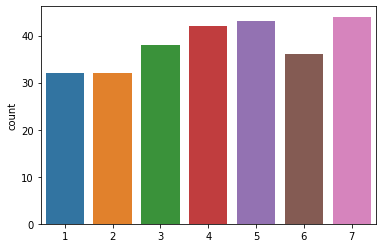

In [6]:
sns.countplot(x=y_train)

# PCA und explained variance ratio

Zunächst wurde eine PCA Pipeline ohne Klassifizierung erstellt. Die kumulative erklärte Varianz enthalten in den einzelnen Principal Components wurde explorative geplottet und die Anzahl der einzelnen Components für jeweil 75, 90, 95, 99 % der enthaltenen Varianz wurden ermittelt.

[1.86618722e-01 1.24870908e-01 9.07014104e-02 7.50306281e-02
 7.06214534e-02 2.87593323e-02 1.72911161e-02 1.61515590e-02
 1.20610014e-02 1.16451132e-02 1.15532656e-02 9.07745571e-03
 7.96032095e-03 7.71581260e-03 6.31439661e-03 5.27858493e-03
 5.10904903e-03 4.86969409e-03 4.76957350e-03 4.51124692e-03
 4.39664376e-03 4.22116405e-03 4.12826242e-03 4.03838214e-03
 3.79778867e-03 3.74390091e-03 3.66294476e-03 3.51056112e-03
 3.49491397e-03 3.37491637e-03 3.33157893e-03 3.21232651e-03
 3.13255092e-03 3.10946288e-03 3.06810482e-03 2.99926282e-03
 2.95616885e-03 2.90204425e-03 2.89611969e-03 2.83565734e-03
 2.81239104e-03 2.78298359e-03 2.75033340e-03 2.72492911e-03
 2.68007342e-03 2.64644141e-03 2.61574235e-03 2.58631481e-03
 2.57163891e-03 2.55348312e-03 2.52663661e-03 2.51831546e-03
 2.47218515e-03 2.45942738e-03 2.41823659e-03 2.41018364e-03
 2.37553646e-03 2.35999286e-03 2.34012965e-03 2.33079805e-03
 2.28513361e-03 2.24015813e-03 2.22619297e-03 2.20324778e-03
 2.18990761e-03 2.158781

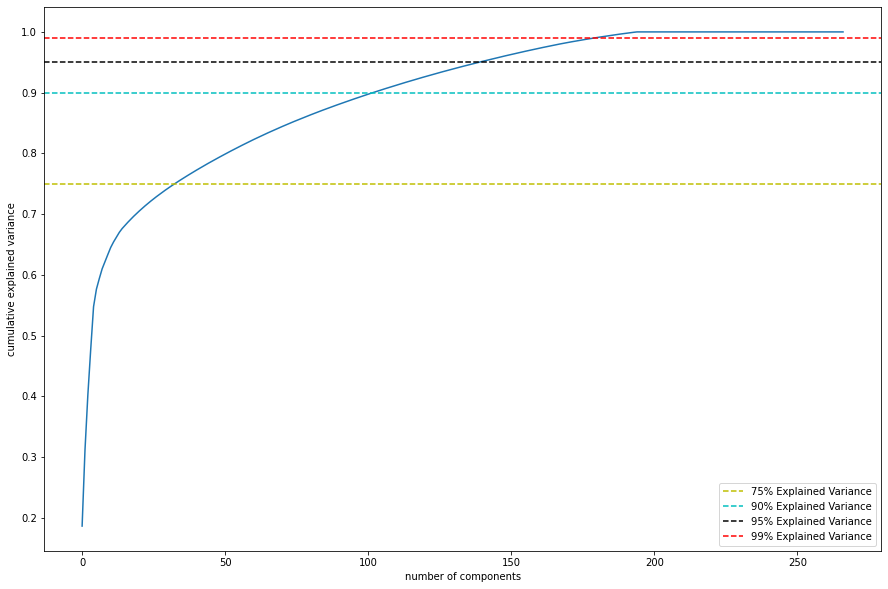

In [7]:
from sklearn.pipeline import Pipeline as Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(random_state=RANDOM_SEED))
    ]
)
pipeline.fit(X_train)

### Show the number of the explained variance ratio and the number of components
print(pipeline.named_steps["pca"].explained_variance_ratio_)
print("Number of Components: ", pipeline.named_steps["pca"].n_components_)

### Plot explained variance as a function of number of Components
fig, ax = plt.subplots(1,1, figsize=(15,10), squeeze=False)
ax = plt.plot(np.cumsum(pipeline.named_steps["pca"].explained_variance_ratio_))
### Draw horizontal lines at 0.75, 0.9, 0.95, 0.99
plt.axhline(y = 0.75, color='y', linestyle='--', label = '75% Explained Variance')
plt.axhline(y = 0.90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 0.95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 0.99, color='r', linestyle='--', label = '99% Explained Variance')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend(loc='best')
plt.show()

In [8]:
pca_var_lst = [0.75, 0.90, 0.95, 0.99]
n_comp_lst = []
for i in pca_var_lst:
    pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(i, random_state=RANDOM_SEED))
    ])
    pipeline.fit(X_train)
    n_comp = pipeline.named_steps["pca"].n_components_
    n_comp_lst.append(n_comp)
    print(f"{i*100} % explained variance: {n_comp}")
print(n_comp_lst)

75.0 % explained variance: 34
90.0 % explained variance: 103
95.0 % explained variance: 140
99.0 % explained variance: 180
[34, 103, 140, 180]


# Random Forest Classification Pipeline

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [10]:
pca_rf_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(random_state=RANDOM_SEED)),
        ("rforest", RandomForestClassifier(random_state=RANDOM_SEED))
    ]
)

pca_rf_estimator = GridSearchCV(
    estimator=pca_rf_pipeline,
    param_grid = {
        "pca__n_components":[34, 103, 140],
        "rforest__max_depth":[10, 30, 50],
        "rforest__n_estimators":[80, 100, 200],
        # "rforest__bootstrap":[True, False],
        # # "rforest__criterion":["gini", "entropy", "log_loss"]
    },
    cv=3,
    verbose=2,
    scoring="f1_weighted",
    )

pca_rf_estimator.fit(X_train, y_train)
print(f"The best parameters: {pca_rf_estimator.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=80; total time=   4.8s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=80; total time=   4.7s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=80; total time=   4.8s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=100; total time=   4.7s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=100; total time=   4.8s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=100; total time=   5.1s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=200; total time=   4.9s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=200; total time=   4.8s
[CV] END pca__n_components=34, rforest__max_depth=10, rforest__n_estimators=200; total time=   5.0s
[CV] END pca__n_components=34, rforest__ma

# Die besten Parameter werden in die pipeline integriert und das Modell wird evaluiert

In [11]:
### Setze die besten Parameter in die Pipeline ein und fitte erneut auf Trainingsdaten
pca_rf_pipeline.set_params(**pca_rf_estimator.best_params_)
pca_rf_pipeline.fit(X_train, y_train)

### Klassifierungsevaluation
pca_rf_pred = pca_rf_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, pca_rf_pred))
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, pca_rf_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, pca_rf_pred):.4f}")

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      0.92      0.96        25
           3       0.79      0.73      0.76        26
           4       0.66      0.83      0.73        23
           5       0.95      0.91      0.93        22
           6       0.96      0.93      0.94        27
           7       1.00      1.00      1.00        20

    accuracy                           0.90       173
   macro avg       0.91      0.90      0.90       173
weighted avg       0.91      0.90      0.90       173

TESTING RESULTS: 
CONFUSION MATRIX:
[[30  0  0  0  0  0  0]
 [ 0 23  2  0  0  0  0]
 [ 0  0 19  7  0  0  0]
 [ 0  0  3 19  1  0  0]
 [ 0  0  0  1 20  1  0]
 [ 0  0  0  2  0 25  0]
 [ 0  0  0  0  0  0 20]]
ACCURACY SCORE:
0.9017


# Random Forest Classification without PCA

In [12]:
rf_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("rforest", RandomForestClassifier(random_state=RANDOM_SEED))
    ]
)

rf_estimator = GridSearchCV(
    estimator=rf_pipeline,
    param_grid = {
        "rforest__max_depth":[10, 30, 50],
        "rforest__n_estimators":[80, 100, 200],
        # "rforest__bootstrap":[True, False],
        # # "rforest__criterion":["gini", "entropy", "log_loss"]
    },
    cv=3,
    verbose=2,
    scoring="f1_weighted",
    )

rf_estimator.fit(X_train, y_train)
print(f"The best parameters: {rf_estimator.best_params_}")

### Setze die besten Parameter in die Pipeline ein und fitte erneut auf Trainingsdaten
rf_pipeline.set_params(**rf_estimator.best_params_)
rf_pipeline.fit(X_train, y_train)

### Klassifierungsevaluation
rf_pred = rf_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, rf_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, rf_pred):.4f}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ....rforest__max_depth=10, rforest__n_estimators=80; total time=   3.7s
[CV] END ....rforest__max_depth=10, rforest__n_estimators=80; total time=   3.6s
[CV] END ....rforest__max_depth=10, rforest__n_estimators=80; total time=   3.6s
[CV] END ...rforest__max_depth=10, rforest__n_estimators=100; total time=   3.9s
[CV] END ...rforest__max_depth=10, rforest__n_estimators=100; total time=   3.8s
[CV] END ...rforest__max_depth=10, rforest__n_estimators=100; total time=   4.0s
[CV] END ...rforest__max_depth=10, rforest__n_estimators=200; total time=   5.5s
[CV] END ...rforest__max_depth=10, rforest__n_estimators=200; total time=   5.4s
[CV] END ...rforest__max_depth=10, rforest__n_estimators=200; total time=   5.3s
[CV] END ....rforest__max_depth=30, rforest__n_estimators=80; total time=   3.5s
[CV] END ....rforest__max_depth=30, rforest__n_estimators=80; total time=   3.6s
[CV] END ....rforest__max_depth=30, rforest__n_es

# ROC and Precision/Recall Curves für jede Klasse
Die Kurven müssen für jede Klasse einzeln angefertigt werden. Dabei müssen die Labels zunächst binariziert werden.

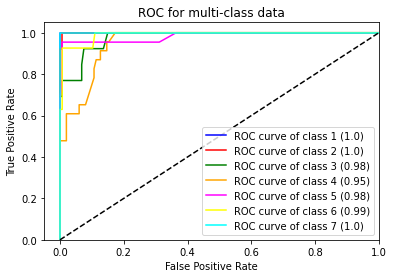

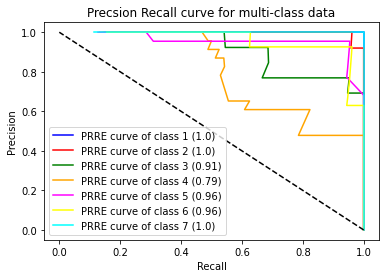

In [13]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_score = pca_rf_pipeline.fit(X_train, y_train).predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4, 5, 6, 7])
n_classes = y_test_bin.shape[1]

# ROC CURVE
#########################
fpr = dict()
tpr = dict()
roc_auc = dict()
### Generate ROC_AUC Score for each class for each instance
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'magenta', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label=f"ROC curve of class {i+1} ({round(roc_auc[i],2)})"
             )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for multi-class data')
plt.legend(loc="best")
plt.show()


# PRECISION RECALL CURVE
#########################
precision = dict()
recall = dict()
precrec_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    precrec_auc[i] = auc(recall[i], precision[i])
for i, color in zip(range(n_classes), colors):
    plt.plot(precision[i], recall[i], color=color,
             label=f"PRRE curve of class {i+1} ({round(precrec_auc[i],2)})"
             )
plt.plot([1, 0], [0, 1], 'k--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Precsion Recall curve for multi-class data')
plt.legend(loc="best")
plt.show()

# Andere Klassifizierungsmodelle zum Vergleich

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression

In [15]:
lr_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(random_state=RANDOM_SEED)),
        ("lr", LogisticRegression(max_iter=10000))
    ]
)

lr_estimator = GridSearchCV(
    estimator=lr_pipeline,
    param_grid = {
        "pca__n_components":[34],
        "lr__penalty": ["l1", "l2", "elasticnet", None]
    },
    cv=3,
    verbose=2,
    scoring="f1_weighted",
    )

lr_estimator.fit(X_train, y_train)
print(f"The best parameters: {lr_estimator.best_params_}")

### Setze die besten Parameter in die Pipeline ein und fitte erneut auf Trainingsdaten
lr_pipeline.set_params(**lr_estimator.best_params_)
lr_pipeline.fit(X_train, y_train)

### Klassifierungsevaluation
lr_pred = lr_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, lr_pred))
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, lr_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, lr_pred):.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............lr__penalty=l1, pca__n_components=34; total time=   4.4s
[CV] END ...............lr__penalty=l1, pca__n_components=34; total time=   3.9s
[CV] END ...............lr__penalty=l1, pca__n_components=34; total time=   3.9s
[CV] END ...............lr__penalty=l2, pca__n_components=34; total time=   5.4s
[CV] END ...............lr__penalty=l2, pca__n_components=34; total time=   5.0s
[CV] END ...............lr__penalty=l2, pca__n_components=34; total time=   6.1s
[CV] END .......lr__penalty=elasticnet, pca__n_components=34; total time=   3.5s
[CV] END .......lr__penalty=elasticnet, pca__n_components=34; total time=   3.4s
[CV] END .......lr__penalty=elasticnet, pca__n_components=34; total time=   3.7s
[CV] END .............lr__penalty=None, pca__n_components=34; total time=   4.4s
[CV] END .............lr__penalty=None, pca__n_components=34; total time=   4.4s
[CV] END .............lr__penalty=None, pca__n_co

c:\Users\miche\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\miche\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\miche\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\miche\AppData\Local\Programs\Python\Python39\lib\site-pac

The best parameters: {'lr__penalty': 'l2', 'pca__n_components': 34}
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      0.80      0.89        25
           3       0.72      0.81      0.76        26
           4       0.70      0.70      0.70        23
           5       0.84      0.95      0.89        22
           6       0.96      0.93      0.94        27
           7       1.00      1.00      1.00        20

    accuracy                           0.88       173
   macro avg       0.89      0.88      0.88       173
weighted avg       0.89      0.88      0.89       173

TESTING RESULTS: 
CONFUSION MATRIX:
[[30  0  0  0  0  0  0]
 [ 0 20  5  0  0  0  0]
 [ 0  0 21  5  0  0  0]
 [ 0  0  3 16  4  0  0]
 [ 0  0  0  0 21  1  0]
 [ 0  0  0  2  0 25  0]
 [ 0  0  0  0  0  0 20]]
ACCURACY SCORE:
0.8844


# kNN

In [16]:
kNN_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("pca", PCA(random_state=RANDOM_SEED)),
        ("kNN", KNeighborsClassifier())
    ]
)

kNN_estimator = GridSearchCV(
    estimator=kNN_pipeline,
    param_grid = {
        "pca__n_components":[34],
        "kNN__n_neighbors": [3, 5, 10, 20, 50],
    },
    cv=3,
    verbose=2,
    scoring="f1_weighted",
    )

kNN_estimator.fit(X_train, y_train)
print(f"The best parameters: {kNN_estimator.best_params_}")

### Setze die besten Parameter in die Pipeline ein und fitte erneut auf Trainingsdaten
kNN_pipeline.set_params(**kNN_estimator.best_params_)
kNN_pipeline.fit(X_train, y_train)

### Klassifierungsevaluation
kNN_pred = kNN_pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, kNN_pred))
print("TESTING RESULTS: \n===============================")
print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, kNN_pred)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, kNN_pred):.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ...........kNN__n_neighbors=3, pca__n_components=34; total time=   5.9s
[CV] END ...........kNN__n_neighbors=3, pca__n_components=34; total time=   4.9s
[CV] END ...........kNN__n_neighbors=3, pca__n_components=34; total time=   5.2s
[CV] END ...........kNN__n_neighbors=5, pca__n_components=34; total time=   5.4s
[CV] END ...........kNN__n_neighbors=5, pca__n_components=34; total time=   5.0s
[CV] END ...........kNN__n_neighbors=5, pca__n_components=34; total time=   5.8s
[CV] END ..........kNN__n_neighbors=10, pca__n_components=34; total time=   5.1s
[CV] END ..........kNN__n_neighbors=10, pca__n_components=34; total time=   5.0s
[CV] END ..........kNN__n_neighbors=10, pca__n_components=34; total time=   5.1s
[CV] END ..........kNN__n_neighbors=20, pca__n_components=34; total time=   5.1s
[CV] END ..........kNN__n_neighbors=20, pca__n_components=34; total time=   5.0s
[CV] END ..........kNN__n_neighbors=20, pca__n_co